# **[WIP] BipedalWalker - MultiSkillPPO (Experimental)**
The implementation of Multi-Skill PPO for BipedalWalker v3 hardcore.



## Initialization

In [1]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt

In [2]:
from sim.GymTrainer import GymTrainer
from framework.MultiSkillPPO import MultiSkillPPOAgent

import torch
trainDevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Create the simulation environment
sim = GymTrainer(
    'BipedalWalker-v3', 
    evalDevice="cpu", 
    trainDevice=trainDevice, 
    render_mode='rgb_array', 
    envNum=1,
    hardcore=False,
    batchSize=8000,
    maxEpisode=6000,
    maxStep=100000,
    seed=555)

=============Initializing=============
Initializing Gym Environments of BipedalWalker-v3
init envs
set seeds 555


In [4]:
# Create the agent
agent = MultiSkillPPOAgent(
    actionNum=sim.actionSize(), 
    stateNum=sim.stateSize(), 
    gamma=0.99, 
    lamda=0.95,
    eps=0.2,
    rwShaper=lambda rwds: torch.clamp(rwds, min = -1.0),
    entropyBeta=0.0002,
    memorySize=8000,
    batchSize=2000,
    trainEpoch=70,
    policyLR=1e-4, 
    criticLR=1e-4,
    skillNum=2,
    hiddenSkill=[48], 
    hiddenActor=[48], 
    layerCritic=[64])

In [ ]:
name, writer = sim.makeSummaryWriter(agent)

## Training

In [ ]:
sim.train(agent, writer)

In [5]:
agent.load_state_dict(torch.load("/home/rtu/gym_plaground/RLPlayground/runs/BipedalWalker-v3-normal-MultiSkillPPOAgent-20251202-085631/best_weight.pt"))

<All keys matched successfully>

KeyboardInterrupt: 

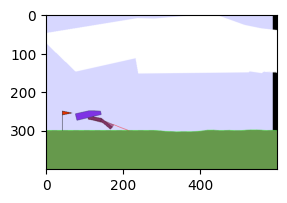

In [6]:
sim.test(
    agent = agent, 
    episode = 40, 
    maxStep = 10000, 
    renderStep = 5,
    writer = None)